In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
import seaborn as sns
sns.set()

In [4]:
# time series - statsmodels 
# Seasonality decomposition
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.seasonal import seasonal_decompose 
# holt winters 
# single exponential smoothing
from statsmodels.tsa.holtwinters import SimpleExpSmoothing   
# double and triple exponential smoothing
from statsmodels.tsa.holtwinters import ExponentialSmoothing

In [6]:
df = pd.read_csv('train_tsa.csv',index_col='Date', parse_dates=True)
# finding shape of the dataframe
# having a look at the data
df1=df[df.Store==1]
df2=df1[df1.Dept==14]
df2.head()

,Store,Dept,Weekly_Sales,IsHoliday
Date,,,,
2010-02-05,1,14,19466.91,False
2010-02-12,1,14,18129.02,True
2010-02-19,1,14,17491.36,False
2010-02-26,1,14,16118.26,False
2010-03-05,1,14,18268.78,False


In [7]:
df2.drop(['Store','Dept','IsHoliday'],axis='columns',inplace=True)

c:\users\vamsikrishna\appdata\local\programs\python\python39\lib\site-packages\pandas\core\frame.py:4901: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [8]:
df2.head()

,Weekly_Sales
Date,
2010-02-05,19466.91
2010-02-12,18129.02
2010-02-19,17491.36
2010-02-26,16118.26
2010-03-05,18268.78


<AxesSubplot:title={'center':'Weekly_Sales'}, xlabel='Date'>

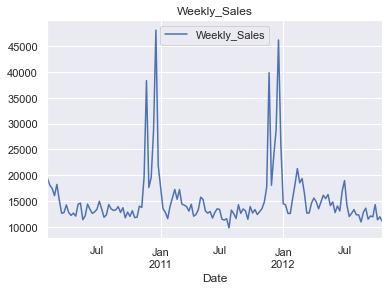

In [9]:
# plotting the original data
df2[['Weekly_Sales']].plot(title='Weekly_Sales')

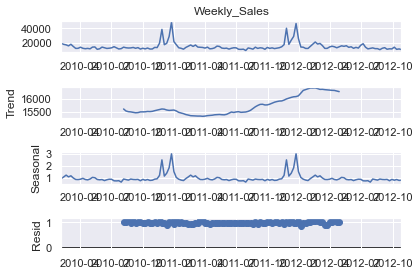

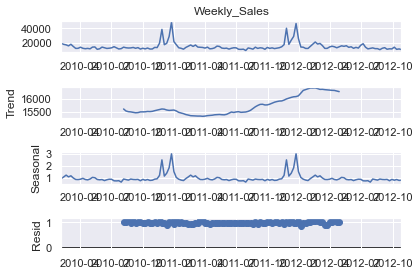

In [10]:
decompose_result = seasonal_decompose(df2['Weekly_Sales'],model='multiplicative')
decompose_result.plot()

In [55]:
# Set the frequency of the date time index as Monthly start as indicated by the data
df2.index.freq = 'W-FRI'
# Set the value of Alpha and define m (Time Period)
m = 12
alpha = 1/(2*m)

C:\Users\VAMSIK~1\AppData\Local\Temp/ipykernel_8532/3367445694.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['HWES1'] = SimpleExpSmoothing(df2['Weekly_Sales']).fit(smoothing_level=alpha,optimized=False,use_brute=True).fittedvalues


<AxesSubplot:title={'center':'Holt Winters Single Exponential Smoothing'}, xlabel='Date'>

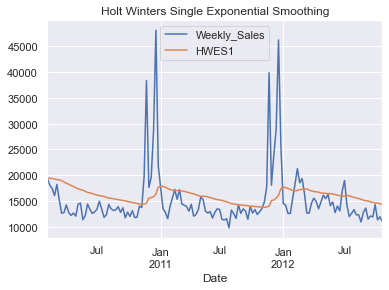

In [56]:
df2['HWES1'] = SimpleExpSmoothing(df2['Weekly_Sales']).fit(smoothing_level=alpha,optimized=False,use_brute=True).fittedvalues
df2[['Weekly_Sales','HWES1']].plot(title='Holt Winters Single Exponential Smoothing')


In [71]:
df3=df[df.Store==1]
df4=df1[df3.Dept==14]

df4.index.freq = 'W-FRI'

# Split into train and test set
train_df4 = df4[:120]
test_df4 = df4[120:]

Text(0.5, 1.0, 'Train, Test and Predicted Test using Holt Winters')

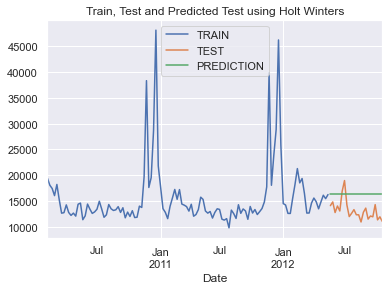

In [72]:
fitted_model=SimpleExpSmoothing(train_df4['Weekly_Sales']).fit(smoothing_level=alpha,optimized=False,use_brute=True)
test_predictions = fitted_model.forecast(23)
train_df4['Weekly_Sales'].plot(legend=True,label='TRAIN')
test_df4['Weekly_Sales'].plot(legend=True,label='TEST',figsize=(6,4))
test_predictions.plot(legend=True,label='PREDICTION')
plt.title('Train, Test and Predicted Test using Holt Winters')

<AxesSubplot:xlabel='Date'>

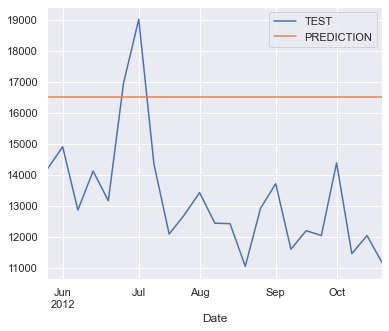

In [73]:
test_df4['Weekly_Sales'].plot(legend=True,label='TEST',figsize=(6,5))
test_predictions.plot(legend=True,label='PREDICTION',xlim=['2012-05-25','2012-10-26'])

In [74]:
from sklearn.metrics import mean_absolute_error,mean_squared_error

print(mean_absolute_error(list(test_df4['Weekly_Sales']),list(test_predictions)))
print(mean_squared_error(list(test_df4['Weekly_Sales']),list(test_predictions)))
print(fitted_model.aic)
print(fitted_model.bic)

3498.7738532883864
13838837.921698267
2099.6808978731497
2105.255881358714


c:\users\vamsikrishna\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\holtwinters\model.py:915: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
C:\Users\VAMSIK~1\AppData\Local\Temp/ipykernel_8532/669853234.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['HWES2_ADD'] = ExponentialSmoothing(df2['Weekly_Sales'],trend='add').fit().fittedvalues
c:\users\vamsikrishna\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\holtwinters\model.py:915: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
C:\Users\VAMSIK~1\AppData\Local\Temp/ipykernel_8532/669853234.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy

<AxesSubplot:title={'center':'Holt Winters Double Exponential Smoothing: Additive and Multiplicative Trend'}, xlabel='Date'>

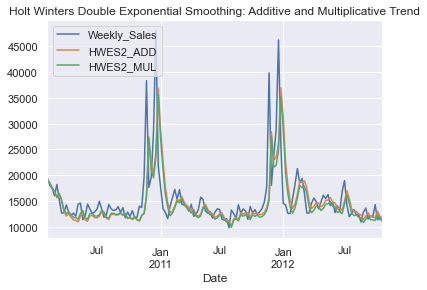

In [75]:
df2['HWES2_ADD'] = ExponentialSmoothing(df2['Weekly_Sales'],trend='add').fit().fittedvalues
df2['HWES2_MUL'] = ExponentialSmoothing(df2['Weekly_Sales'],trend='mul').fit().fittedvalues
df2[['Weekly_Sales','HWES2_ADD','HWES2_MUL']].plot(title='Holt Winters Double Exponential Smoothing: Additive and Multiplicative Trend')


c:\users\vamsikrishna\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\holtwinters\model.py:915: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


Text(0.5, 1.0, 'Train, Test and Predicted Test using Holt Winters')

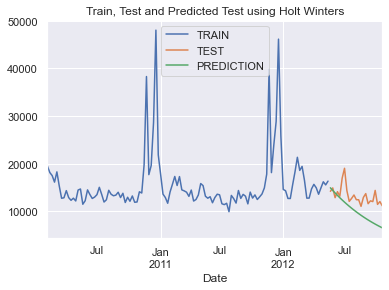

In [76]:
fitted_model = ExponentialSmoothing(train_df4['Weekly_Sales'],trend='mul',seasonal_periods=52).fit()
test_predictions = fitted_model.forecast(23)
train_df4['Weekly_Sales'].plot(legend=True,label='TRAIN')
test_df4['Weekly_Sales'].plot(legend=True,label='TEST',figsize=(6,4))
test_predictions.plot(legend=True,label='PREDICTION')
plt.title('Train, Test and Predicted Test using Holt Winters')

<AxesSubplot:xlabel='Date'>

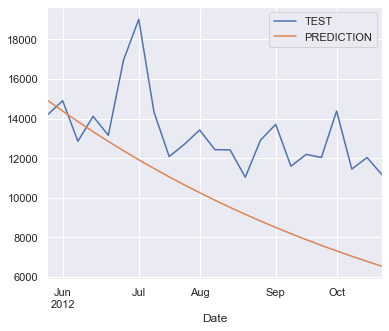

In [77]:
test_df4['Weekly_Sales'].plot(legend=True,label='TEST',figsize=(6,5))
test_predictions.plot(legend=True,label='PREDICTION',xlim=['2012-05-25','2012-10-26'])

In [78]:
from sklearn.metrics import mean_absolute_error,mean_squared_error

print(mean_absolute_error(list(test_df4['Weekly_Sales']),list(test_predictions)))
print(mean_squared_error(list(test_df4['Weekly_Sales']),list(test_predictions)))
print(fitted_model.aic)
print(fitted_model.bic)

3226.844955550816
14237765.328193989
2071.447233494133
2082.5972004652613


C:\Users\VAMSIK~1\AppData\Local\Temp/ipykernel_8532/290905401.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['HWES3_ADD'] = ExponentialSmoothing(df2['Weekly_Sales'],trend='add',seasonal='add',seasonal_periods=52).fit().fittedvalues
c:\users\vamsikrishna\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\holtwinters\model.py:915: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
C:\Users\VAMSIK~1\AppData\Local\Temp/ipykernel_8532/290905401.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_

<AxesSubplot:title={'center':'Holt Winters Triple Exponential Smoothing: Additive and Multiplicative Seasonality'}, xlabel='Date'>

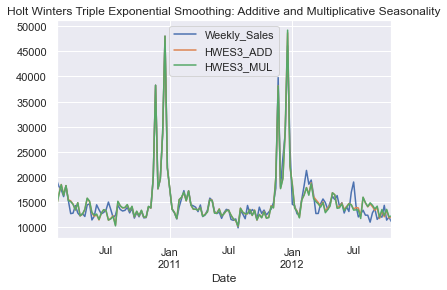

In [79]:
df2['HWES3_ADD'] = ExponentialSmoothing(df2['Weekly_Sales'],trend='add',seasonal='add',seasonal_periods=52).fit().fittedvalues

df2['HWES3_MUL'] = ExponentialSmoothing(df2['Weekly_Sales'],trend='mul',seasonal='mul',seasonal_periods=52).fit().fittedvalues

df2[['Weekly_Sales','HWES3_ADD','HWES3_MUL']].plot(title='Holt Winters Triple Exponential Smoothing: Additive and Multiplicative Seasonality')


In [80]:
df3=df[df.Store==1]
df4=df1[df3.Dept==14]

df4.index.freq = 'W-FRI'

# Split into train and test set
train_df4 = df4[:120]
test_df4 = df4[120:]

c:\users\vamsikrishna\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\holtwinters\model.py:915: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


Text(0.5, 1.0, 'Train, Test and Predicted Test using Holt Winters')

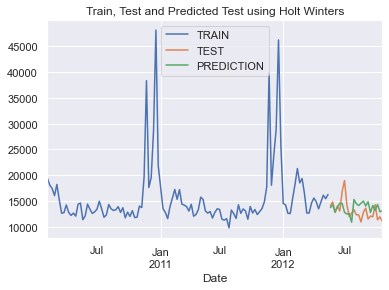

In [81]:
fitted_model = ExponentialSmoothing(train_df4['Weekly_Sales'],trend='mul',seasonal='mul',seasonal_periods=52).fit()
test_predictions = fitted_model.forecast(23)
train_df4['Weekly_Sales'].plot(legend=True,label='TRAIN')
test_df4['Weekly_Sales'].plot(legend=True,label='TEST',figsize=(6,4))
test_predictions.plot(legend=True,label='PREDICTION')
plt.title('Train, Test and Predicted Test using Holt Winters')

In [69]:
df4.tail(23)

,Store,Dept,Weekly_Sales,IsHoliday
Date,,,,
2012-05-25,1,14,14186.59,False
2012-06-01,1,14,14903.87,False
2012-06-08,1,14,12858.85,False
2012-06-15,1,14,14117.36,False
2012-06-22,1,14,13158.38,False
2012-06-29,1,14,16958.84,False
2012-07-06,1,14,19019.04,False
2012-07-13,1,14,14332.72,False
2012-07-20,1,14,12083.33,False


<AxesSubplot:xlabel='Date'>

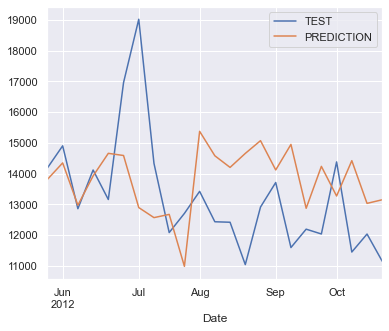

In [82]:
test_df4['Weekly_Sales'].plot(legend=True,label='TEST',figsize=(6,5))
test_predictions.plot(legend=True,label='PREDICTION',xlim=['2012-05-25','2012-10-26'])

In [83]:
from sklearn.metrics import mean_absolute_error,mean_squared_error

print(mean_absolute_error(list(test_df4['Weekly_Sales']),list(test_predictions)))
print(mean_squared_error(list(test_df4['Weekly_Sales']),list(test_predictions)))
print(fitted_model.aic)
print(fitted_model.bic)

1768.459176198358
4928565.690119148
1832.6933621555825
1988.792899751377


In [42]:
fitted_model.aic

1832.6933621555825

In [43]:
fitted_model.bic

1988.792899751377